<a href="https://colab.research.google.com/github/leaop/Graduation/blob/main/Introdu%C3%A7%C3%A3o_ao_EDA_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd
import json #biblioteca para armazenagem e troca de dados
import seaborn as sns

## Introdução ao EDA (Exploratory Data Analysis)

Sempre que deparamos com um desafio envolvendo dados, temos o dever de entender melhor esses dados que estamos transformando. 

Uma das formas mais utilizadas para entender os nossos dados é o **Processo de EDA (Exploratory Data Analysis ou Análise Exploratória de Dados)**

Muitas vezes não sabemos como fazer a extração de informações e também quais objetivos sobre essa base. Uma situação exemplo é quando um cientista de dados que trabalhou anos em uma empresa do ramo de Telecomunicações, após uma recolocação de mercado está atualmente alocado em uma empresa da área de Educação. Cientistas de dados devem estar preparados para transformar dados de qualquer natureza.

O EDA consiste em um processo genérico para obtenção de informações e Conclusões em bases de dados, como meio nesse processo utilizamos ferramentas de Estatística, Representações Gráficas e Modelos Matemáticos para extração dessas informações. O processo pode ser dividido em 6 Etapas:

1. **Coleta e Dominância do Conhecimento**: Obter os dados requeridos e dominar conhecimentos relacionados ao conhecimento dos dados

2. **Análise Descritiva**: Entender a estrutura e natureza dos dados, obtendo uma visão completa das características da base de dados.

3. **Consolidação dos Dados**: Modificar a estrutura e natureza dos dados conforme os objetivos estabelecidos. 

3. **Análise sob a Teoria Distribuição Normal**: Entender o comportamento dos dados conforme a teoria da Distribuição Normal.

4. **Tratamento de Valores Nulos e Valores Atípicos**: A ausência de dados e valores fora da realidade conforme a Teoria Distribuição Normal  contaminam as informações geradas a partir da base analisada, portanto, esses valores devem ser mitigados ou removidos.

5. **Visualização de Dados**: A representação gráfica dos dados analisados é uma maneira eficiente de gerar informações.

6. **Extração de Padrões**: Usando algoritmos podemos verificar padrões escondidos que gráficos ou Estatística básica não alcançam, modelos de machine learning podem ser utilizados para entendimento da base analisada. 

**Não há um consenso sobre um definitivo do processo de EDA, o informado neste documento é um amálgama de várias bibliografias.**


Você sabe quanto e com o que o senadores gastaram com as verbas de Cotas para Exercício da Atividade Parlamentar dos Senadores (CEAPS)?

CEAPS são gastos pertinentes à atividade parlamentar do senador ao longo do seu mandato, esses gastos são ressarcidos pela união.

será que nossos representantes no senado fazem o uso consciente desses recursos? 

Vamos explorar a base desses gastos e prover resultados quali-quantitativos para determinar se há uma boa gestão.

Dados Abertos referentes ao Senado Federal estão presentes no site https://www12.senado.leg.br/transparencia

## Coleta e Dominância do Conhecimento

In [ ]:
#Dados abertos das despesas dos senadores
response = requests.get('https://adm.senado.gov.br/adm-dadosabertos/api/v1/senadores/despesas_ceaps/2018/').content

JSON é um formato amplamente utilizado para o armazenamento e intercâmbio de dados. Por exemplo, a base de dados NoSQL como MongoDB armazena os dados em formato JSON, e as respostas do REST API estão na sua maioria disponíveis em JSON

In [ ]:
data = json.loads(response)

Esse pacote é para analisar o arquivo JSON

some JSON:
x = '{ "name":"John", "age":30, "city":"New York"}'

parse x:
y = json.loads(x)

the result is a Python dictionary:
print(y["age"])

In [ ]:
data

[{'id': 2102182,
  'tipoDocumento': 5,
  'ano': 2018,
  'mes': 7,
  'nomeSenador': 'AÉCIO NEVES',
  'tipoDespesa': 'Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.',
  'cpfCnpj': '18007971000129',
  'fornecedor': 'ASAMAR S A',
  'documento': '5696326',
  'data': '2018-07-11',
  'detalhamento': 'IPTU referente ao mês de julho de 2018.',
  'valorReembolsado': 992.18},
 {'id': 2103024,
  'tipoDocumento': 5,
  'ano': 2018,
  'mes': 7,
  'nomeSenador': 'AÉCIO NEVES',
  'tipoDespesa': 'Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.',
  'cpfCnpj': '18007971000129',
  'fornecedor': 'ASAMAR S A',
  'documento': '9632696',
  'data': '2018-07-20',
  'detalhamento': 'Referente ao aluguel - julho/2018.',
  'valorReembolsado': 7000},
 {'id': 2103025,
  'tipoDocumento': 4,
  'ano': 2018,
  'mes': 7,
  'nomeSenador': 'AÉCIO NEVES',
  'tipoDespesa': 'Aluguel de imóveis para escritório político, compreendendo despesas con

Embora este formato funcione bem para o armazenamento e intercâmbio de dados, necessita de ser convertido num formulário tabular para posterior análise. É provável que se trate de 2 tipos de estrutura JSON, um objecto JSON ou uma lista de objectos JSON. Na linguagem interna Python, é mais provável que lide com uma dita ou uma lista de ditos


https://towardsdatascience.com/all-pandas-json-normalize-you-should-know-for-flattening-json-13eae1dfb7dd

In [ ]:
df = pd.json_normalize(data)

In [ ]:
df

,id,tipoDocumento,ano,mes,nomeSenador,tipoDespesa,cpfCnpj,fornecedor,documento,data,detalhamento,valorReembolsado
0,2097818,7,2018,5,AÉCIO NEVES,Aquisição de material de consumo para uso no e...,00896242000105,FIBRA Telecomunicações LTDA,2018/366,2018-05-15,Locação de equipamento telefônico.,171.03
1,2098479,7,2018,5,AÉCIO NEVES,"Contratação de consultorias, assessorias, pesq...",26894399000195,JOÃO FRANCISCO MEIRELLES SILVA,2018/11,2018-06-11,Contratação de serviços de apoio ao parlamenta...,7000.00
2,2096732,7,2018,5,AÉCIO NEVES,"Locomoção, hospedagem, alimentação, combustíve...",05217384000627,H PLUS ADMINISTRAÇÃO E HOTELARIA LTDA - SCP AT...,97567,2018-05-09,Hospedagem - Brasília/DF da Assessora Maria He...,424.35
3,2096740,3,2018,5,AÉCIO NEVES,"Locomoção, hospedagem, alimentação, combustíve...",00031708000100,SINPETAXI,s/n,2018-05-09,Maria Heloísa Cardoso - matr. 239190 - Assesso...,60.00
4,2098377,6,2018,5,AÉCIO NEVES,"Passagens aéreas, aquáticas e terrestres nacio...",16978175000108,ADRIA VIAGENS E TURISMO LTDA ME,SESNQI,2018-04-25,"Companhia Aérea: GOL, Localizador: SESNQI. Pas...",1064.52
...,...,...,...,...,...,...,...,...,...,...,...,...
24487,2108809,3,2018,10,ZEZÉ PERRELLA,"Aluguel de imóveis para escritório político, c...",09722379000118,Masb 21 Empreendimento Imobiliário Ltda,s/n,2018-10-15,None,13.60
24488,2108808,3,2018,10,ZEZÉ PERRELLA,"Aluguel de imóveis para escritório político, c...",09722379000118,Masb 21 Empreendimento Imobiliário Ltda,S/N,2018-10-15,None,225.28
24489,2108805,3,2018,10,ZEZÉ PERRELLA,"Aluguel de imóveis para escritório político, c...",20493131000165,Prosind,S/N,2018-10-05,None,356.40
24490,2109320,4,2018,10,ZEZÉ PERRELLA,"Aluguel de imóveis para escritório político, c...",02558157000162,Vivo,s/n,2018-11-01,None,75.99


In [ ]:
# Realizar consumo dos dados via api de forma automatizada de 2015 à 2022.

datas = [2015,2016,2017,2018,2019,2020,2021,2022]
#para uma variável em data: response é iagual ao request
#se o X variavel for igual as datas (a minima), a 'data' vai receber o arquivo já convertido
#caso contrário, ele vai adicionar a proxima ao primeiro arquivo convertido

for x in datas:
    response = requests.get('https://adm.senado.gov.br/adm-dadosabertos/api/v1/senadores/despesas_ceaps/{}/'.format(x)).content

    if x == min(datas):
        data = json.loads(response)
    else:
        data.extend(json.loads(response))
        
df = pd.json_normalize(data)

In [ ]:
df

,id,tipoDocumento,ano,mes,nomeSenador,tipoDespesa,cpfCnpj,fornecedor,documento,data,detalhamento,valorReembolsado
0,2002759,3,2015,2,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",00494802863,GILBERTO PISELO DO NASCIMENTO,002/15,2015-02-25,Despesa com pagamento de aluguel de imóvel uti...,6000.00
1,2001145,1,2015,2,ACIR GURGACZ,Divulgação da atividade parlamentar,02147085000160,ASSOCIAÇÃO COMUNITÁRIA JIPARANAENSE - ASCOJIPA,339,2015-02-02,Divulgação da atividade parlamentar,300.00
2,2005025,1,2015,2,ACIR GURGACZ,Divulgação da atividade parlamentar,84721745000130,O.F. CALADO EDIÇÕES,000277,2015-02-25,Despesa com divulgação da atividade parlamenta...,2000.00
3,2001149,1,2015,2,ACIR GURGACZ,"Locomoção, hospedagem, alimentação, combustíve...",34274233009746,VIBRA ENERGIA,000502038,2015-02-10,Despesa com pagamento de combustível para abas...,1728.80
4,2001147,1,2015,2,ACIR GURGACZ,"Locomoção, hospedagem, alimentação, combustíve...",34274233009746,VIBRA ENERGIA,000502045,2015-02-10,Despesa com combustível para abastecimento de ...,2271.58
...,...,...,...,...,...,...,...,...,...,...,...,...
173594,2191398,6,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22052777000132,Exceller Tour,WIXHAI,2022-12-06,"Companhia Aérea: LATAM, Localizador: WIXHAI. P...",2893.04
173595,2192272,6,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22052777000132,Exceller Tour,WITOLM,2022-12-09,"Companhia Aérea: GOL, Localizador: WITOLM. Pas...",1180.19
173596,2192274,6,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22052777000132,Exceller Tour,THPKVQ,2022-12-20,"Companhia Aérea: TAM, Localizador: THPKVQ. Pas...",2671.90
173597,2192244,6,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22052777000132,Exceller Tour,QNN9HX,2022-12-21,"Companhia Aérea: AZUL, Localizador: QNN9HX. Pa...",1334.31


In [ ]:
#converter para CSV
df.to_csv('ceaps_senado_2015_2022.csv')

In [ ]:
#dados de legislatura
response = requests.get('https://legis.senado.leg.br/dadosabertos/senador/lista/legislatura/55/56.json').content

data = json.loads(response)

data['ListaParlamentarLegislatura']['Parlamentares']['Parlamentar'];

In [ ]:
data = data['ListaParlamentarLegislatura']['Parlamentares']['Parlamentar']

In [ ]:
df_senadores = pd.json_normalize(data)

In [ ]:
df_senadores

,IdentificacaoParlamentar.CodigoParlamentar,IdentificacaoParlamentar.NomeParlamentar,IdentificacaoParlamentar.NomeCompletoParlamentar,IdentificacaoParlamentar.SexoParlamentar,IdentificacaoParlamentar.FormaTratamento,IdentificacaoParlamentar.SiglaPartidoParlamentar,Mandatos.Mandato.CodigoMandato,Mandatos.Mandato.UfParlamentar,Mandatos.Mandato.PrimeiraLegislaturaDoMandato.NumeroLegislatura,Mandatos.Mandato.PrimeiraLegislaturaDoMandato.DataInicio,...,Mandatos.Mandato.Suplentes.Suplente,Mandatos.Mandato.Exercicios.Exercicio,Mandatos.Mandato.Exercicios.Exercicio.CodigoExercicio,Mandatos.Mandato.Exercicios.Exercicio.DataInicio,Mandatos.Mandato.Exercicios.Exercicio.DataFim,Mandatos.Mandato.Exercicios.Exercicio.SiglaCausaAfastamento,Mandatos.Mandato.Exercicios.Exercicio.DescricaoCausaAfastamento,IdentificacaoParlamentar.UfParlamentar,Mandatos.Mandato.Exercicios.Exercicio.DataLeitura,Mandatos.Mandato
0,5573,Abel Rebouças,Abel Rebouças São José,Masculino,Senador,PDT,492,BA,55,2015-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5154,Abiancy Cadoso Rosa,Abiancy Cadoso Rosa,Masculino,Senador,CIDADANIA,487,PA,54,2011-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4981,Acir Gurgacz,Acir Marcos Gurgacz,Masculino,Senador,PDT,515,RO,55,2015-02-01,...,"[{'DescricaoParticipacao': '1º Suplente', 'Cod...","[{'CodigoExercicio': '2810', 'DataInicio': '20...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5918,Adilson Gomes,Adilson Gomes Silva,Masculino,Senador,NaN,526,PE,56,2019-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5625,Adilson Silva dos Santos,Adilson Silva dos Santos,Masculino,Senador,PEN,497,RS,55,2015-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,3806,Zequinha Marinho,José da Cruz Marinho,Masculino,Senador,PL,566,PA,56,2019-02-01,...,"[{'DescricaoParticipacao': '1º Suplente', 'Cod...",NaN,2916,2019-02-01,NaN,NaN,NaN,PA,NaN,NaN
402,5144,Zeze Perrella,José Perrella de Oliveira Costa,Masculino,Senador,MDB,441,MG,54,2011-02-01,...,NaN,NaN,2643,2011-07-11,2019-01-31,TER,Término do mandato,NaN,NaN,NaN
403,5118,Zonir Freitas Tetila,Zonir Freitas Tetila,Masculino,Senador,PT,447,MS,54,2011-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
404,5184,Zé Santana,José Ribamar Noleto de Santana,Masculino,Senador,MDB,488,PI,54,2011-02-01,...,NaN,NaN,2878,2018-12-13,2019-01-31,TER,Término do mandato,NaN,NaN,NaN


In [ ]:
df_senadores.to_csv('senadores_2015_2022.csv')

In [ ]:
df_senadores = pd.read_csv('senadores_2015_2022.csv')

In [ ]:
df = pd.read_csv('ceaps_senado_2015_2022.csv')

## Analise Descritiva

#### DF

In [ ]:
df.ano.min()

2015

In [ ]:
df.ano.max()

2022

In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'tipoDocumento', 'ano', 'mes', 'nomeSenador',
       'tipoDespesa', 'cpfCnpj', 'fornecedor', 'documento', 'data',
       'detalhamento', 'valorReembolsado', 'numLegistlatura'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173599 entries, 0 to 173598
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Unnamed: 0        173599 non-null  int64         
 1   id                173599 non-null  int64         
 2   tipoDocumento     173599 non-null  int64         
 3   ano               173599 non-null  int64         
 4   mes               173599 non-null  int64         
 5   nomeSenador       173599 non-null  object        
 6   tipoDespesa       173599 non-null  object        
 7   cpfCnpj           173599 non-null  int64         
 8   fornecedor        173599 non-null  object        
 9   documento         162007 non-null  object        
 10  data              173599 non-null  datetime64[ns]
 11  detalhamento      121676 non-null  object        
 12  valorReembolsado  173599 non-null  float64       
 13  numLegistlatura   173599 non-null  object        
dtypes: d

In [ ]:
df[['valorReembolsado']].describe()

,valorReembolsado
count,173599.000000
mean,1153.959596
std,2887.777513
min,0.010000
25%,135.000000
50%,356.170000
75%,1200.000000
max,270000.000000


In [ ]:
# Qual é o registro com Valor Minímo da Coluna valorReembolsado?
df[df['valorReembolsado'] == df['valorReembolsado'].min()]

,Unnamed: 0,id,tipoDocumento,ano,mes,nomeSenador,tipoDespesa,cpfCnpj,fornecedor,documento,data,detalhamento,valorReembolsado,numLegistlatura
4259,4259,2013240,6,2015,6,DAVI ALCOLUMBRE,"Passagens aéreas, aquáticas e terrestres nacio...",14294443000147,A.Camacho Torres - ME,NaN,2015-06-19,"Companhia Aérea: TAM, Localizador: 7RBYY5. Pas...",0.01,55
7022,7022,2027131,6,2015,12,FERNANDO BEZERRA COELHO,"Passagens aéreas, aquáticas e terrestres nacio...",2575829000148,OCEAIN AIR,7QNCDJ,2015-12-18,"Companhia Aérea: AVIANCA, Localizador: 7QNCDJ....",0.01,55
7023,7023,2027132,6,2015,12,FERNANDO BEZERRA COELHO,"Passagens aéreas, aquáticas e terrestres nacio...",2575829000148,OCEAIN AIR,7QRZVT,2015-12-18,"Companhia Aérea: AVIANCA, Localizador: 7QRZVT....",0.01,55
7024,7024,2028289,6,2015,12,FERNANDO BEZERRA COELHO,"Passagens aéreas, aquáticas e terrestres nacio...",2575829000148,OCEAIN AIR,7LTXVI,2016-01-21,"Companhia Aérea: AVIANCA, Localizador: 7LTXVI....",0.01,55
7027,7027,2028269,6,2015,12,FERNANDO BEZERRA COELHO,"Passagens aéreas, aquáticas e terrestres nacio...",2012862000160,TAM,7QXMZN,2015-12-18,"Companhia Aérea: TAM, Localizador: 7QXMZN. Pas...",0.01,55
7304,7304,2021743,6,2015,10,FERNANDO BEZERRA COELHO,"Passagens aéreas, aquáticas e terrestres nacio...",7575651000159,GOL,KDNPUS,2015-10-27,"Companhia Aérea: GOL, Localizador: KDNPUS. Pas...",0.01,55
7382,7382,2023323,6,2015,11,FERNANDO BEZERRA COELHO,"Passagens aéreas, aquáticas e terrestres nacio...",7575651000159,GOL,AG8QJW,2015-11-05,"Companhia Aérea: GOL, Localizador: AG8QJW. Pas...",0.01,55
11715,11715,2026056,6,2015,11,JOSÉ MARANHÃO,"Passagens aéreas, aquáticas e terrestres nacio...",11902871000117,APOIOTUR VIAGENS E TURISMO LTDA,14857,2015-11-16,"Companhia Aérea: AVIANCA, Localizador: 56N55D....",0.01,55
22087,22087,2015046,1,2015,7,ROSE DE FREITAS,"Locomoção, hospedagem, alimentação, combustíve...",8471100000108,Posto Mclaren LTDA,02579,2015-07-20,NaN,0.01,55
33078,33078,2033935,6,2016,3,FERNANDO BEZERRA COELHO,"Passagens aéreas, aquáticas e terrestres nacio...",7575651000159,GOL,NFPJ4Z,2016-03-22,"Companhia Aérea: GOL, Localizador: NFPJ4Z. Pas...",0.01,55


In [ ]:
# Qual é o registro com Valor Máximo da Coluna valorReembolsado?
df[df['valorReembolsado'] == df['valorReembolsado'].max()]

,Unnamed: 0,id,tipoDocumento,ano,mes,nomeSenador,tipoDespesa,cpfCnpj,fornecedor,documento,data,detalhamento,valorReembolsado,numLegistlatura
57562,57562,2090997,1,2017,12,DAVI ALCOLUMBRE,Divulgação da atividade parlamentar,29337655000131,Start print Comunicação Visual Eireli,36,2018-03-15,NaN,270000.0,55


#### DF_SENADORES

In [ ]:
df_senadores.columns

Index(['IdentificacaoParlamentar.CodigoParlamentar',
       'IdentificacaoParlamentar.NomeParlamentar',
       'IdentificacaoParlamentar.NomeCompletoParlamentar',
       'IdentificacaoParlamentar.SexoParlamentar',
       'IdentificacaoParlamentar.FormaTratamento',
       'IdentificacaoParlamentar.SiglaPartidoParlamentar',
       'Mandatos.Mandato.CodigoMandato', 'Mandatos.Mandato.UfParlamentar',
       'Mandatos.Mandato.PrimeiraLegislaturaDoMandato.NumeroLegislatura',
       'Mandatos.Mandato.PrimeiraLegislaturaDoMandato.DataInicio',
       'Mandatos.Mandato.PrimeiraLegislaturaDoMandato.DataFim',
       'Mandatos.Mandato.SegundaLegislaturaDoMandato.NumeroLegislatura',
       'Mandatos.Mandato.SegundaLegislaturaDoMandato.DataInicio',
       'Mandatos.Mandato.SegundaLegislaturaDoMandato.DataFim',
       'Mandatos.Mandato.DescricaoParticipacao',
       'Mandatos.Mandato.Titular.DescricaoParticipacao',
       'Mandatos.Mandato.Titular.CodigoParlamentar',
       'Mandatos.Mandato.Titular.No

In [ ]:
df_senadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 36 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   IdentificacaoParlamentar.CodigoParlamentar                       406 non-null    object
 1   IdentificacaoParlamentar.NomeParlamentar                         406 non-null    object
 2   IdentificacaoParlamentar.NomeCompletoParlamentar                 406 non-null    object
 3   IdentificacaoParlamentar.SexoParlamentar                         406 non-null    object
 4   IdentificacaoParlamentar.FormaTratamento                         406 non-null    object
 5   IdentificacaoParlamentar.SiglaPartidoParlamentar                 323 non-null    object
 6   Mandatos.Mandato.CodigoMandato                                   394 non-null    object
 7   Mandatos.Mandato.UfParlamentar                       

In [ ]:
df_senadores.head(10)

,IdentificacaoParlamentar.CodigoParlamentar,IdentificacaoParlamentar.NomeParlamentar,IdentificacaoParlamentar.NomeCompletoParlamentar,IdentificacaoParlamentar.SexoParlamentar,IdentificacaoParlamentar.FormaTratamento,IdentificacaoParlamentar.SiglaPartidoParlamentar,Mandatos.Mandato.CodigoMandato,Mandatos.Mandato.UfParlamentar,Mandatos.Mandato.PrimeiraLegislaturaDoMandato.NumeroLegislatura,Mandatos.Mandato.PrimeiraLegislaturaDoMandato.DataInicio,...,Mandatos.Mandato.Suplentes.Suplente,Mandatos.Mandato.Exercicios.Exercicio,Mandatos.Mandato.Exercicios.Exercicio.CodigoExercicio,Mandatos.Mandato.Exercicios.Exercicio.DataInicio,Mandatos.Mandato.Exercicios.Exercicio.DataFim,Mandatos.Mandato.Exercicios.Exercicio.SiglaCausaAfastamento,Mandatos.Mandato.Exercicios.Exercicio.DescricaoCausaAfastamento,IdentificacaoParlamentar.UfParlamentar,Mandatos.Mandato.Exercicios.Exercicio.DataLeitura,Mandatos.Mandato
0,5573,Abel Rebouças,Abel Rebouças São José,Masculino,Senador,PDT,492,BA,55,2015-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5154,Abiancy Cadoso Rosa,Abiancy Cadoso Rosa,Masculino,Senador,CIDADANIA,487,PA,54,2011-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4981,Acir Gurgacz,Acir Marcos Gurgacz,Masculino,Senador,PDT,515,RO,55,2015-02-01,...,"[{'DescricaoParticipacao': '1º Suplente', 'Cod...","[{'CodigoExercicio': '2810', 'DataInicio': '20...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5918,Adilson Gomes,Adilson Gomes Silva,Masculino,Senador,NaN,526,PE,56,2019-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5625,Adilson Silva dos Santos,Adilson Silva dos Santos,Masculino,Senador,PEN,497,RS,55,2015-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6026,Afonso Parente,Afonso Valter Parente Pinto,Masculino,Senador,NaN,578,RR,56,2019-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5170,Agimiro Dias da Costa,Agimiro Dias da Costa,Masculino,Senador,PSDB,451,TO,54,2011-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5140,Airton Sandoval,Airton Sandoval Santana,Masculino,Senador,MDB,485,SP,54,2011-02-01,...,NaN,NaN,2827,2017-03-09,2018-12-31,RET,Retorno do titular,NaN,NaN,NaN
8,5923,Alberto David,Alberto da Silva David,Masculino,Senador,NaN,522,AP,56,2019-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5982,Alessandro Vieira,Alessandro Vieira,Masculino,Senador,PSDB,559,SE,56,2019-02-01,...,"[{'DescricaoParticipacao': '1º Suplente', 'Cod...",NaN,2888,2019-02-01,NaN,NaN,NaN,SE,NaN,NaN


Considerações da Analise Descritiva para próxima etapa de Consolidação dos Dados:

Ações Realizadas:
1. Carga dos Dados via API.
2. União documentos. 

Ações Futuras:
1. Coluna Date está em string, transformar para datetime.
2. Existe Números Negativos Na Coluna valorReembolsado, verificar tratativa.
3. Apagar Colunas desnecessárias
4. Ajustar Nome Parlamentar
5. Merge das Tabelas df e df_senadores

## Consolidação dos Dados

#### DF

In [ ]:
# Testar se a col data pode ser transformada em datetime
#df['data'].astype('datetime64')

Vemos que não possivel transformar toda a coluna data em datetime, o erro acusado que existes valores na coluna fora calendário do Pandas.

In [ ]:
# filtro se exite mesmo um registo com esses valores
df[df['data'] == '2915-10-06']

,Unnamed: 0,id,tipoDocumento,ano,mes,nomeSenador,tipoDespesa,cpfCnpj,fornecedor,documento,data,detalhamento,valorReembolsado,numLegistlatura


In [ ]:
# Podemos transformar os dados em data mitigando os erros com o coerce
# Criamos a coluna data_ para testes
df['data_'] = pd.to_datetime(df['data'], errors = 'coerce')

In [ ]:
# Filtro com valores de data com problemas
df[df['data_'].isna()]

,Unnamed: 0,id,tipoDocumento,ano,mes,nomeSenador,tipoDespesa,cpfCnpj,fornecedor,documento,data,detalhamento,valorReembolsado,numLegistlatura,data_


In [ ]:
# Ajuste as datas com problemas no filtro acima

for index, row in df[df['data_'].isna()].iterrows():
    dia = row['data'][-2:]
    df['data'].iloc[index]  = '{}-{}-{}'.format(row['ano'],row['mes'],dia)

In [ ]:
# Teste a tratativa acima transforma a coluna date em datetime
df['data'].astype('datetime64')

C:\Users\pedroDesktop\AppData\Local\Temp\ipykernel_8188\3930225709.py:2: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  df['data'].astype('datetime64')


0        2015-02-25
1        2015-02-02
2        2015-02-25
3        2015-02-10
4        2015-02-10
            ...    
173594   2022-12-06
173595   2022-12-09
173596   2022-12-20
173597   2022-12-21
173598   2022-12-30
Name: data, Length: 173599, dtype: datetime64[ns]

In [ ]:
# Transformar os dados para datetime
df['data'] = df['data'].astype('datetime64')
# Apagar a coluna de teste
del df['data_']

C:\Users\pedroDesktop\AppData\Local\Temp\ipykernel_8188\145711827.py:2: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  df['data'] = df['data'].astype('datetime64')


In [ ]:
# Verificar se existe valores negativos na col valorReembolsado
df[df['valorReembolsado'] <= 0]

,Unnamed: 0,id,tipoDocumento,ano,mes,nomeSenador,tipoDespesa,cpfCnpj,fornecedor,documento,data,detalhamento,valorReembolsado,numLegistlatura


In [ ]:
# Transforme os valores menores de 0 em Absoluto
df['valorReembolsado'] = abs(df['valorReembolsado'])

#### DF_SENADORES

In [ ]:
# Vamos apagar colunas desnecessárias
del df_senadores['IdentificacaoParlamentar.UrlPaginaParlamentar']
del df_senadores['IdentificacaoParlamentar.EmailParlamentar'] 
del df_senadores['IdentificacaoParlamentar.UrlPaginaParticular']
del df_senadores['IdentificacaoParlamentar.UrlFotoParlamentar']
del df_senadores['IdentificacaoParlamentar.CodigoPublicoNaLegAtual']
del df_senadores['IdentificacaoParlamentar.FormaTratamento']
del df_senadores['Mandatos.Mandato.Exercicios.Exercicio.SiglaCausaAfastamento']
del df_senadores['IdentificacaoParlamentar.UfParlamentar']
del df_senadores['Mandatos.Mandato.Exercicios.Exercicio.DataLeitura']
del df_senadores['Mandatos.Mandato']
del df_senadores['Mandatos.Mandato.Suplentes.Suplente']
del df_senadores['Mandatos.Mandato.Exercicios.Exercicio']

In [ ]:
# Transforme o nome parlamentar em maiuscula
df_senadores['IdentificacaoParlamentar.NomeParlamentar'] = df_senadores['IdentificacaoParlamentar.NomeParlamentar'].apply(lambda x: x.upper())

In [ ]:
# Corrija a Tipagem das colunas de natureza data em objeto para datetime
df_senadores['Mandatos.Mandato.Exercicios.Exercicio.DataInicio'] = pd.to_datetime(df_senadores['Mandatos.Mandato.Exercicios.Exercicio.DataInicio'], errors = 'coerce')
df_senadores['Mandatos.Mandato.Exercicios.Exercicio.DataFim'] = pd.to_datetime(df_senadores['Mandatos.Mandato.Exercicios.Exercicio.DataFim'], errors = 'coerce')

df_senadores['Mandatos.Mandato.PrimeiraLegislaturaDoMandato.DataInicio'] = pd.to_datetime(df_senadores['Mandatos.Mandato.PrimeiraLegislaturaDoMandato.DataInicio'], errors = 'coerce')
df_senadores['Mandatos.Mandato.PrimeiraLegislaturaDoMandato.DataFim'] = pd.to_datetime(df_senadores['Mandatos.Mandato.PrimeiraLegislaturaDoMandato.DataFim'], errors = 'coerce')
       
df_senadores['Mandatos.Mandato.SegundaLegislaturaDoMandato.DataInicio'] = pd.to_datetime(df_senadores['Mandatos.Mandato.SegundaLegislaturaDoMandato.DataInicio'], errors = 'coerce')
df_senadores['Mandatos.Mandato.SegundaLegislaturaDoMandato.DataFim'] = pd.to_datetime(df_senadores['Mandatos.Mandato.SegundaLegislaturaDoMandato.DataFim'], errors = 'coerce') 

#### Merge dos datasets DF e DF_SENADORES

Para fazer uma união entre bases de dados temos que procurar chaves primárias em comum entre as duas bases em questão.

Qual seria essas chaves?

In [ ]:
df_senadores.head(5)

,IdentificacaoParlamentar.CodigoParlamentar,IdentificacaoParlamentar.NomeParlamentar,IdentificacaoParlamentar.NomeCompletoParlamentar,IdentificacaoParlamentar.SexoParlamentar,IdentificacaoParlamentar.SiglaPartidoParlamentar,Mandatos.Mandato.CodigoMandato,Mandatos.Mandato.UfParlamentar,Mandatos.Mandato.PrimeiraLegislaturaDoMandato.NumeroLegislatura,Mandatos.Mandato.PrimeiraLegislaturaDoMandato.DataInicio,Mandatos.Mandato.PrimeiraLegislaturaDoMandato.DataFim,...,Mandatos.Mandato.Titular.DescricaoParticipacao,Mandatos.Mandato.Titular.CodigoParlamentar,Mandatos.Mandato.Titular.NomeParlamentar,Mandatos.Mandato.Suplentes.Suplente.DescricaoParticipacao,Mandatos.Mandato.Suplentes.Suplente.CodigoParlamentar,Mandatos.Mandato.Suplentes.Suplente.NomeParlamentar,Mandatos.Mandato.Exercicios.Exercicio.CodigoExercicio,Mandatos.Mandato.Exercicios.Exercicio.DataInicio,Mandatos.Mandato.Exercicios.Exercicio.DataFim,Mandatos.Mandato.Exercicios.Exercicio.DescricaoCausaAfastamento
0,5573,ABEL REBOUÇAS,Abel Rebouças São José,Masculino,PDT,492,BA,55,2015-02-01,2019-01-31,...,Titular,5523,Otto Alencar,2º Suplente,5575,Marizete,NaN,NaT,NaT,NaN
1,5154,ABIANCY CADOSO ROSA,Abiancy Cadoso Rosa,Masculino,CIDADANIA,487,PA,54,2011-02-01,2015-01-31,...,Titular,3634,Flexa Ribeiro,1º Suplente,380,Nicias Ribeiro,NaN,NaT,NaT,NaN
2,4981,ACIR GURGACZ,Acir Marcos Gurgacz,Masculino,PDT,515,RO,55,2015-02-01,2019-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
3,5918,ADILSON GOMES,Adilson Gomes Silva,Masculino,NaN,526,PE,56,2019-02-01,2023-01-31,...,Titular,4545,Jarbas Vasconcelos,1º Suplente,5917,Fernando Dueire,NaN,NaT,NaT,NaN
4,5625,ADILSON SILVA DOS SANTOS,Adilson Silva dos Santos,Masculino,PEN,497,RS,55,2015-02-01,2019-01-31,...,Titular,5533,Lasier Martins,1º Suplente,5623,Christopher Goulart,NaN,NaT,NaT,NaN


In [ ]:
df_senadores.columns

Index(['IdentificacaoParlamentar.CodigoParlamentar',
       'IdentificacaoParlamentar.NomeParlamentar',
       'IdentificacaoParlamentar.NomeCompletoParlamentar',
       'IdentificacaoParlamentar.SexoParlamentar',
       'IdentificacaoParlamentar.SiglaPartidoParlamentar',
       'Mandatos.Mandato.CodigoMandato', 'Mandatos.Mandato.UfParlamentar',
       'Mandatos.Mandato.PrimeiraLegislaturaDoMandato.NumeroLegislatura',
       'Mandatos.Mandato.PrimeiraLegislaturaDoMandato.DataInicio',
       'Mandatos.Mandato.PrimeiraLegislaturaDoMandato.DataFim',
       'Mandatos.Mandato.SegundaLegislaturaDoMandato.NumeroLegislatura',
       'Mandatos.Mandato.SegundaLegislaturaDoMandato.DataInicio',
       'Mandatos.Mandato.SegundaLegislaturaDoMandato.DataFim',
       'Mandatos.Mandato.DescricaoParticipacao',
       'Mandatos.Mandato.Titular.DescricaoParticipacao',
       'Mandatos.Mandato.Titular.CodigoParlamentar',
       'Mandatos.Mandato.Titular.NomeParlamentar',
       'Mandatos.Mandato.Suplentes.

In [ ]:
df.head(5)

,Unnamed: 0,id,tipoDocumento,ano,mes,nomeSenador,tipoDespesa,cpfCnpj,fornecedor,documento,data,detalhamento,valorReembolsado,numLegistlatura
0,0,2002759,3,2015,2,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",494802863,GILBERTO PISELO DO NASCIMENTO,002/15,2015-02-25,Despesa com pagamento de aluguel de imóvel uti...,6000.00,55
1,1,2001145,1,2015,2,ACIR GURGACZ,Divulgação da atividade parlamentar,2147085000160,ASSOCIAÇÃO COMUNITÁRIA JIPARANAENSE - ASCOJIPA,339,2015-02-02,Divulgação da atividade parlamentar,300.00,55
2,2,2005025,1,2015,2,ACIR GURGACZ,Divulgação da atividade parlamentar,84721745000130,O.F. CALADO EDIÇÕES,000277,2015-02-25,Despesa com divulgação da atividade parlamenta...,2000.00,55
3,3,2001149,1,2015,2,ACIR GURGACZ,"Locomoção, hospedagem, alimentação, combustíve...",34274233009746,VIBRA ENERGIA,000502038,2015-02-10,Despesa com pagamento de combustível para abas...,1728.80,55
4,4,2001147,1,2015,2,ACIR GURGACZ,"Locomoção, hospedagem, alimentação, combustíve...",34274233009746,VIBRA ENERGIA,000502045,2015-02-10,Despesa com combustível para abastecimento de ...,2271.58,55


In [ ]:
df.tail(5)

,Unnamed: 0,id,tipoDocumento,ano,mes,nomeSenador,tipoDespesa,cpfCnpj,fornecedor,documento,data,detalhamento,valorReembolsado,numLegistlatura
173594,173594,2191398,6,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22052777000132,Exceller Tour,WIXHAI,2022-12-06,"Companhia Aérea: LATAM, Localizador: WIXHAI. P...",2893.04,56
173595,173595,2192272,6,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22052777000132,Exceller Tour,WITOLM,2022-12-09,"Companhia Aérea: GOL, Localizador: WITOLM. Pas...",1180.19,56
173596,173596,2192274,6,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22052777000132,Exceller Tour,THPKVQ,2022-12-20,"Companhia Aérea: TAM, Localizador: THPKVQ. Pas...",2671.90,56
173597,173597,2192244,6,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22052777000132,Exceller Tour,QNN9HX,2022-12-21,"Companhia Aérea: AZUL, Localizador: QNN9HX. Pa...",1334.31,56
173598,173598,2193622,6,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22052777000132,Exceller Tour,WMQWBX,2022-12-30,"Companhia Aérea: TAM, Localizador: WMQWBX. Pas...",2250.72,56


Analisando as duas bases, podemos integrar elas com as informações de **Nome do Parlamentar** e **Numero Legislatura**.

Já colocamos o **Nome do Parlamentar** de cada base com as mesmas caracteristicas, falta criar uma coluna **Numero Legislatura** na base DF.

In [ ]:
# Criação da Coluna Numero Legislatura referente ao gasto na base DF

df['numLegistlatura'] = ''

index_55 = df[(df['data'] >= '2015-02-01') & (df['data'] <= '2019-01-31')].index

index_56 = df[(df['data'] >= '2019-02-01') & (df['data'] <= '2023-01-31')].index

df.loc[index_55,'numLegistlatura'] = '55'

df.loc[index_56,'numLegistlatura'] = '56'

In [ ]:
#  Merge entre as bases DF e DF_SENADORES
df_merged = df.merge(df_senadores, left_on=['nomeSenador'],
                       right_on=['IdentificacaoParlamentar.NomeParlamentar'],
                       how = 'left')

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173599 entries, 0 to 173598
Data columns (total 38 columns):
 #   Column                                                           Non-Null Count   Dtype         
---  ------                                                           --------------   -----         
 0   Unnamed: 0                                                       173599 non-null  int64         
 1   id                                                               173599 non-null  int64         
 2   tipoDocumento                                                    173599 non-null  int64         
 3   ano                                                              173599 non-null  int64         
 4   mes                                                              173599 non-null  int64         
 5   nomeSenador                                                      173599 non-null  object        
 6   tipoDespesa                                                      173

In [ ]:
#  Filtro dos registros de gastos que não teve o merge desejado
df_nan = df_merged[df_merged['IdentificacaoParlamentar.CodigoParlamentar'].isna()]

In [ ]:
df_nan['nomeSenador'].unique()

array(['ALFREDO NASCIMENTO', 'ANA RITA', 'ANÍBAL DINIZ',
       'ANTÔNIO CARLOS VALADARES', 'CASILDO MALDANER', 'CÍCERO LUCENA',
       'CYRO MIRANDA', 'DELCIDIO DO AMARAL', 'EDUARDO SUPLICY',
       'EPITÁCIO CAFETEIRA', 'INÁCIO ARRUDA', 'IVONETE DANTAS',
       'JOÃO DURVAL', 'JOÃO VICENTE CLAUDINO', 'MÁRIO COUTO',
       'MARCO ANTÔNIO COSTA', 'PEDRO SIMON', 'RUBEN FIGUEIRÓ',
       'SODRÉ SANTORO', 'ZEZÉ PERRELLA', 'PEDRO CHAVES DOS SANTOS FILHO',
       'JEAN PAUL PRATES', 'WEVERTON ROCHA',
       'MARIA ELIZA DE AGUIAR E SILVA', 'SAMUEL ARAUJO'], dtype=object)

In [ ]:
#  prova que existe valores que não estão batendo.
df_senadores[df_senadores['IdentificacaoParlamentar.NomeParlamentar'].isin(df_nan['nomeSenador'].unique())]

,IdentificacaoParlamentar.CodigoParlamentar,IdentificacaoParlamentar.NomeParlamentar,IdentificacaoParlamentar.NomeCompletoParlamentar,IdentificacaoParlamentar.SexoParlamentar,IdentificacaoParlamentar.SiglaPartidoParlamentar,Mandatos.Mandato.CodigoMandato,Mandatos.Mandato.UfParlamentar,Mandatos.Mandato.PrimeiraLegislaturaDoMandato.NumeroLegislatura,Mandatos.Mandato.PrimeiraLegislaturaDoMandato.DataInicio,Mandatos.Mandato.PrimeiraLegislaturaDoMandato.DataFim,...,Mandatos.Mandato.Titular.DescricaoParticipacao,Mandatos.Mandato.Titular.CodigoParlamentar,Mandatos.Mandato.Titular.NomeParlamentar,Mandatos.Mandato.Suplentes.Suplente.DescricaoParticipacao,Mandatos.Mandato.Suplentes.Suplente.CodigoParlamentar,Mandatos.Mandato.Suplentes.Suplente.NomeParlamentar,Mandatos.Mandato.Exercicios.Exercicio.CodigoExercicio,Mandatos.Mandato.Exercicios.Exercicio.DataInicio,Mandatos.Mandato.Exercicios.Exercicio.DataFim,Mandatos.Mandato.Exercicios.Exercicio.DescricaoCausaAfastamento


In [ ]:
df_senadores['IdentificacaoParlamentar.NomeParlamentar'].unique()

array(['ABEL REBOUÇAS', 'ABIANCY CADOSO ROSA', 'ACIR GURGACZ',
       'ADILSON GOMES', 'ADILSON SILVA DOS SANTOS', 'AFONSO PARENTE',
       'AGIMIRO DIAS DA COSTA', 'AIRTON SANDOVAL', 'ALBERTO DAVID',
       'ALESSANDRO VIEIRA', 'ALEXANDRE SILVEIRA', 'ALFREDO COTAIT NETO',
       'ALISSON TAVEIRA', 'ALOYSIO NUNES FERREIRA', 'ALVARO DIAS',
       'ALZENIR PORTO', 'ALZIRA FERREIRA BARROS', 'ANA AMÉLIA',
       'ANA MARIA', 'ANA PAULA TONGO', 'ANDRE FILIPE',
       'ANDRELINA BARBOSA DA CUNHA', 'ANGELO CORONEL',
       'ANTONIO ANASTASIA', 'ANTONIO CARLOS RODRIGUES',
       'ANTONIO CARLOS VALADARES', 'ANTÔNIO MARCOS GAVAZZONI',
       'ANTÔNIO MILTON PESSOA FALCÃO FILHO', 'ARISTAVORA DE SOUZA SANTOS',
       'ARLINDO SILVA', 'ARMANDO JOSÉ DE OLIVEIRA', 'ARMANDO MONTEIRO',
       'AROLDE DE OLIVEIRA', 'ASTRONAUTA MARCOS PONTES',
       'ATAÍDES OLIVEIRA', 'ATHOS DE ALMEIDA LOPES', 'ATILIO FRANCISCO',
       'AYRES MARCHETTI', 'AÉCIO NEVES', 'BEBETO', 'BENE CAMACHO',
       'BENEDITO DE LI

In [ ]:
# Crie uma função que corrija os nomes para um mesmo padrão nas bases DF e DF_senadores
!pip install unidecode



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 5.0 MB/s eta 0:00:00


In [ ]:
from unidecode import unidecode
df['nomeSenador_norm'] = df['nomeSenador'].apply(unidecode)
df_senadores['IdentificacaoParlamentar.NomeParlamentar_norm'] = df_senadores['IdentificacaoParlamentar.NomeParlamentar'].apply(unidecode)

In [ ]:
merged_df = df.merge(df_senadores, left_on=['nomeSenador'],
                       right_on=['IdentificacaoParlamentar.NomeParlamentar'],
                       how = 'left')

In [ ]:
df_nan = merged_df[merged_df['IdentificacaoParlamentar.CodigoParlamentar'].isna()]

In [ ]:
df_nan['IdentificacaoParlamentar.NomeParlamentar'].unique()

array([nan], dtype=object)

In [ ]:
df_nan['nomeSenador'].unique()

array(['ALFREDO NASCIMENTO', 'ANÍBAL DINIZ', 'ANA RITA',
       'ANTÔNIO CARLOS VALADARES', 'CASILDO MALDANER', 'CÍCERO LUCENA',
       'CYRO MIRANDA', 'DELCIDIO DO AMARAL', 'EDUARDO SUPLICY',
       'EPITÁCIO CAFETEIRA', 'INÁCIO ARRUDA', 'IVONETE DANTAS',
       'JOÃO DURVAL', 'JOÃO VICENTE CLAUDINO', 'MARCO ANTÔNIO COSTA',
       'MÁRIO COUTO', 'PEDRO SIMON', 'RUBEN FIGUEIRÓ', 'SODRÉ SANTORO',
       'ZEZÉ PERRELLA', 'PEDRO CHAVES DOS SANTOS FILHO',
       'JEAN PAUL PRATES', 'WEVERTON ROCHA',
       'MARIA ELIZA DE AGUIAR E SILVA', 'SAMUEL ARAUJO'], dtype=object)

Considerações da Analise Descritiva para próxima etapa de Análise sob a Teoria Distribuição Normal:

Ações Realizadas:
1. Coluna Date está em string, transformar para datetime.
2. Existe Números Negativos Na Coluna valorReembolsado, verificar tratativa.
3. Apagar Colunas desnecessárias
4. Ajustar Nome Parlamentar
5. Merge das Tabelas df e df_senadores

Ações Futuras:
1. Verificar valores nulos presentes nas colunas documento e detalhamento
2. Verificar Comportamento da coluna valorReembolsado
3. Valores nulos presentes nas colunas documento e detalhamento não são pertinentes para eliminação ou de inserção de novos valores.

## Análise sob a Teoria Distribuição Normal

<Axes: xlabel='valorReembolsado', ylabel='Count'>

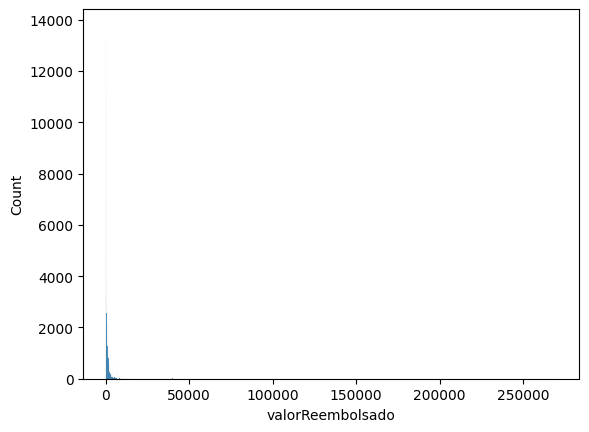

In [ ]:
sns.histplot(df["valorReembolsado"])

<Axes: xlabel='valorReembolsado', ylabel='Count'>

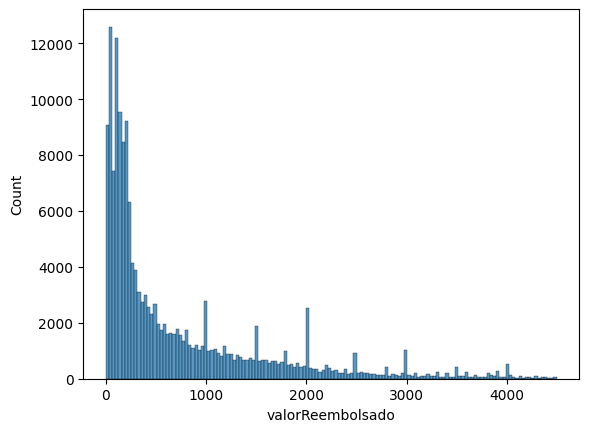

In [ ]:
# Como resolver essa visulização acima? vemos a existência de outliers estão "sujando" o histograma.

df_filter = df[df["valorReembolsado"] < df["valorReembolsado"].quantile(.95)]

sns.histplot(df_filter['valorReembolsado'])

In [ ]:
# Realize o .describe() desses dados filtrados.
df_filter[['valorReembolsado']].describe()

,valorReembolsado
count,164754.000000
mean,712.765505
std,871.017240
min,0.010000
25%,126.075000
50%,312.500000
75%,1000.000000
max,4496.030000


In [ ]:
# Vamos Entender os outliers? Possivelmente são informações importantes para simplemente serem descartadas. 
# Realize o .describe() desses dados.

df_outliers = df[df["valorReembolsado"] >= df["valorReembolsado"].quantile(.95)]

df_outliers[['valorReembolsado']].describe()

,valorReembolsado
count,8845.000000
mean,9371.991404
std,8853.673039
min,4500.000000
25%,5400.000000
50%,6800.000000
75%,10000.000000
max,270000.000000


<Axes: ylabel='Count'>

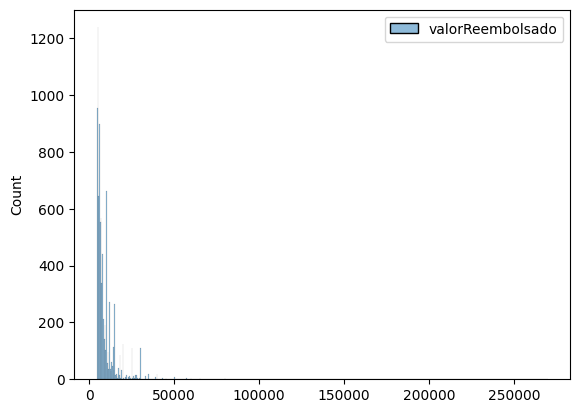

In [ ]:
sns.histplot(df_outliers[['valorReembolsado']])

Considerações da Analise Descritiva para próxima etapa de Análise sob a Tratamento de Valores Nulos e Valores Atípicos:

Ações Realizadas:
1. Verificar valores nulos presentes nas colunas documento e detalhamento
2. Verificar Comportamento da coluna valorReembolsado
3. Valores nulos presentes nas colunas documento e detalhamento não são pertinentes para eliminação ou de inserção de novos valores.

Ações Futuras:
1. Validar valores nulos da Col detalhamento
2. Tratativa para Valores Outliers

## Tratamento de Valores Nulos e Valores Atípicos

In [ ]:
df[df['detalhamento'].isna()]

,Unnamed: 0,id,tipoDocumento,ano,mes,nomeSenador,tipoDespesa,cpfCnpj,fornecedor,documento,data,detalhamento,valorReembolsado
68,68,2000857,4,2015,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",5914650000166,ENERGISA,647777,2015-01-14,NaN,52.34
146,146,2000792,3,2015,1,ALFREDO NASCIMENTO,"Aluguel de imóveis para escritório político, c...",2321157100,Gilberto Assunção de Oliveira,NaN,2015-01-05,NaN,3420.00
147,147,2000796,4,2015,1,ALFREDO NASCIMENTO,"Aluguel de imóveis para escritório político, c...",108786000165,Net,NaN,2015-01-05,NaN,307.74
915,915,2025447,1,2015,12,ALVARO DIAS,"Locomoção, hospedagem, alimentação, combustíve...",7057670000193,Hotel Metrópole Maringá,29996,2015-12-07,NaN,225.57
1135,1135,2011576,1,2015,6,ALVARO DIAS,"Locomoção, hospedagem, alimentação, combustíve...",7686368000102,WTC - Sheraton,002270572,2015-06-24,NaN,506.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173588,173588,2192243,2,2022,12,ZEQUINHA MARINHO,"Locomoção, hospedagem, alimentação, combustíve...",19614800000120,AUTO POSTO INDEPENDENCIA COMERCIO DE COMBUSTÍV...,685963,2022-12-02,NaN,200.00
173589,173589,2192248,2,2022,12,ZEQUINHA MARINHO,"Locomoção, hospedagem, alimentação, combustíve...",34307872000119,J M F COMÉRCIO DE COMBUSTIVEIS LTDA.,21169,2022-12-04,NaN,300.00
173590,173590,2192242,2,2022,12,ZEQUINHA MARINHO,"Locomoção, hospedagem, alimentação, combustíve...",9631455000180,POSTO CAMILA VAREJISTA DE COMBUSTÍVEL LTDA. EPP,1446149,2022-12-02,NaN,352.50
173591,173591,2192250,2,2022,12,ZEQUINHA MARINHO,"Locomoção, hospedagem, alimentação, combustíve...",2280133004262,POSTO ICCAR LTDA.,197440,2022-12-07,NaN,200.03


In [ ]:
# Calcule qual é a % de valores nulos na col detalhamento
len(df[df['detalhamento'].isna()]) / len(df) * 100

29.909734503078933

**é pertinente apagar ou alterar os valores nulos e outliers da base?**

Considerações da Analise Descritiva para próxima etapa de Análise sob a Tratamento de Valores Nulos e Valores Atípicos:

Ações Realizadas:
1. Validar valores nulos da Col detalhamento
2. Tratativa para Valores Outliers

Ações Futuras:
1. Extrair insights por visualização de dados


## Visualização de Dados

In [ ]:
# Vamos ver quem são os 5 senadores mais gastões ou econômicos do senado? Utilize Tabelas para representar os metadados.
group_senador_valorReembolsado = df[['nomeSenador','valorReembolsado']].groupby(['nomeSenador']).sum(['valorReembolsado']).sort_values(by='valorReembolsado',ascending=False)

group_senador_valorReembolsado.head(5)

,valorReembolsado
nomeSenador,
PAULO ROCHA,3602758.48
TELMÁRIO MOTA,3552478.33
DAVI ALCOLUMBRE,3407374.58
OMAR AZIZ,3367994.47
SÉRGIO PETECÃO,3324759.91


In [ ]:
group_senador_valorReembolsado.tail(5)

,valorReembolsado
nomeSenador,
MÁRIO COUTO,4016.60
GILBERTO PISELO,3923.04
MARCO ANTÔNIO COSTA,2746.55
EPITÁCIO CAFETEIRA,1865.95
NAILDE PANTA,1650.62


Temos um problema, temos valores baixos pelo fato que normalmente senadores eleitos são substituidos temporariamente por N motivos por seus respectivos suplentes, nesse caso temos que classificar em **senadores titulares** e **senadores suplentes**.

Precisamos melhorar nossa base de dados, portanto, devemos procurar mais dados abertos sobre o mandato dos senadores. Para isso temos que voltar na etapa, fazer carregamento e enriquecimento de dados na primeira etapa.

Consulte as api neste [link](https://legis.senado.leg.br/dadosabertos/docs/resource_ListaSenadorService.html)

In [ ]:
# Qual são os 5 partidos Mais Gastões ou econômicos do senado? 
# Utilize Tabelas para representar os metadados.

In [ ]:
# Faça um comparativo entre os mandatos de 2019 - 2022 e 2015 - 2018, qual foi o custo total para ambos mandatos por ano? 
# Utilize Gráfico de linha para representar os metadados.

In [ ]:
# Qual são os 5 tipos de despesa mais utilizadas por senadores? 
# Desfio: Some o restante dos tipos de despesas em uma barra "Outros"? 
# Utilize Gráfico de Barra para representar os metadados.

In [ ]:
# Qual são os 5 tipos de despesa mais gastas por senadores? 
# Utilize Tabelas para representar os metadados.

In [ ]:
# Qual é o gasto médio entre Homens e Mulheres? 
# Utilize Tabelas para representar os metadados.

In [ ]:
# Representividade Feminina aumentou em 2019 - 2022 em comparação a legislatura anteior?
# Utilize Gráfico de pizza para representar os metadados.

"Se a saúde pública no Brasil parece estar ruim das pernas, isso jamais atingirá senadores, ex-senadores, suplentes que assumiram o cargo, tampouco seus cônjuges e dependentes. E para que isso seja possível, é exigido um único requisito destes políticos: exercício ininterrupto por 180 dias. Isso quer dizer que nenhum deles precisa contribuir para ter direito ao plano de saúde mais cobiçado do país."

[fonte](https://gilbert92.jusbrasil.com.br/artigos/141608410/plano-de-saude-de-senadores-e-vitalicio-completo-e-estendido-a-conjuge-e-dependentes)

com base na afirmação abaixo responda a alternativa abaixo:

In [ ]:
# Quais são os Senadores Suplentes exerceram mais de 180 dias de mandato?
# Utilize Tabelas para representar os metadados.

In [ ]:
# Existe uma Correlação entre idade do senador e gastos gerados por ele?
# Utilize Gráfico de disperssão para representar os metadados.

#### Dever de casa

Integre as bases [profissões](https://legis.senado.leg.br/dadosabertos/docs/resource_ListaSenadorService.html?_gl=1*1m0s91v*_ga*MjEyNTA3MDAxOC4xNjgwNDc3NzU2*_ga_CW3ZH25XMK*MTY4MTUyMTA1Ny40LjEuMTY4MTUyMTMzNi4wLjAuMA..#resource_ListaSenadorService_profissaoSenadorXml_GET) e [historicoAcademico](https://legis.senado.leg.br/dadosabertos/docs/resource_ListaSenadorService.html?_gl=1*1m0s91v*_ga*MjEyNTA3MDAxOC4xNjgwNDc3NzU2*_ga_CW3ZH25XMK*MTY4MTUyMTA1Ny40LjEuMTY4MTUyMTMzNi4wLjAuMA..#resource_ListaSenadorService_historicoAcademicoSenadorXml_GET) no EDA e gere visualizações e insights com esses novos dados.

#### Desafio

Correlacione o período da pandemia do COVID-19 com os gastos de CEAPS. Crie o merge dos dados e novas vizualizações sobre isso.